In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Set view options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

In [3]:
# Read in slurm, ce5, and ce6 time series data
slurm = pd.read_csv('../data/slurm_time_series.csv', index_col = 'TIMESTAMP', parse_dates = True)
ce5 = pd.read_csv('../data/ce5_time_series.csv', index_col = 'TIMESTAMP', parse_dates = True)
ce6 = pd.read_csv('../data/ce6_time_series.csv', index_col = 'TIMESTAMP', parse_dates = True)

In [4]:
# Perform 1 day resample and 7 day rolling window on slurm time series data
agg_dict = {'STARTEDJOBS': 'sum',
            'RUNNINGJOBS': 'mean',
            'ENDEDJOBS': 'sum',
            'REQMEMTOT': 'mean',
            'USEDMEM': 'mean',
            'NODES': 'mean',
            'CPUS': 'mean',
}

slurm_1day_resample = slurm.resample('1D').agg(agg_dict)
slurm_1day_rolling = slurm.rolling('1D').agg(agg_dict)
slurm_7day_rolling = slurm.rolling('7D').agg(agg_dict)

In [5]:
# Perform 1 day resample of ce5 and ce6 time series data
ce5_1day_resample = ce5.resample('1D').sum()
ce6_1day_resample = ce6.resample('1D').sum()

ce5_1day_resample['SERVER'] = 'CE5'
ce6_1day_resample['SERVER'] = 'CE6'

ce5_ce6_1day_resample = ce5_1day_resample.append(ce6_1day_resample).sort_values('TIMESTAMP')
ce5_ce6_1day_resample['TIMEOUT_PCT'] = ce5_ce6_1day_resample['TIMEOUTS'] / ce5_ce6_1day_resample['COMMANDS']
ce5_ce6_1day_resample['SBATCH_TIMEOUT_PCT'] = ce5_ce6_1day_resample['SBATCH_TIMEOUTS'] / ce5_ce6_1day_resample['SBATCH_COMMANDS']
ce5_ce6_1day_resample['AVG_RUNTIME'] = ce5_ce6_1day_resample['RUNTIMES'] / ce5_ce6_1day_resample['COMMANDS']
ce5_ce6_1day_resample['AVG_SBATCH_RUNTIME'] = ce5_ce6_1day_resample['SBATCH_RUNTIMES'] / ce5_ce6_1day_resample['SBATCH_COMMANDS']

In [6]:
# Perform 1 day rolling window on ce5 and ce6 time series data
ce5_1day_rolling = ce5.rolling('1D').sum()
ce6_1day_rolling = ce6.rolling('1D').sum()

ce5_1day_rolling['SERVER'] = 'CE5'
ce6_1day_rolling['SERVER'] = 'CE6'

ce5_ce6_1day_rolling = ce5_1day_rolling.append(ce6_1day_rolling).sort_values('TIMESTAMP')
ce5_ce6_1day_rolling['TIMEOUT_PCT'] = ce5_ce6_1day_rolling['TIMEOUTS'] / ce5_ce6_1day_rolling['COMMANDS']
ce5_ce6_1day_rolling['SBATCH_TIMEOUT_PCT'] = ce5_ce6_1day_rolling['SBATCH_TIMEOUTS'] / ce5_ce6_1day_rolling['SBATCH_COMMANDS']
ce5_ce6_1day_rolling['AVG_RUNTIME'] = ce5_ce6_1day_rolling['RUNTIMES'] / ce5_ce6_1day_rolling['COMMANDS']
ce5_ce6_1day_rolling['AVG_SBATCH_RUNTIME'] = ce5_ce6_1day_rolling['SBATCH_RUNTIMES'] / ce5_ce6_1day_rolling['SBATCH_COMMANDS']

In [7]:
# Perform 7 day rolling window on ce5 and ce6 time series data
ce5_7day_rolling = ce5.rolling('7D').sum()
ce6_7day_rolling = ce6.rolling('7D').sum()

ce5_7day_rolling['SERVER'] = 'CE5'
ce6_7day_rolling['SERVER'] = 'CE6'

ce5_ce6_7day_rolling = ce5_7day_rolling.append(ce6_7day_rolling).sort_values('TIMESTAMP')
ce5_ce6_7day_rolling['TIMEOUT_PCT'] = ce5_ce6_7day_rolling['TIMEOUTS'] / ce5_ce6_7day_rolling['COMMANDS']
ce5_ce6_7day_rolling['SBATCH_TIMEOUT_PCT'] = ce5_ce6_7day_rolling['SBATCH_TIMEOUTS'] / ce5_ce6_7day_rolling['SBATCH_COMMANDS']
ce5_ce6_7day_rolling['AVG_RUNTIME'] = ce5_ce6_7day_rolling['RUNTIMES'] / ce5_ce6_7day_rolling['COMMANDS']
ce5_ce6_7day_rolling['AVG_SBATCH_RUNTIME'] = ce5_ce6_7day_rolling['SBATCH_RUNTIMES'] / ce5_ce6_7day_rolling['SBATCH_COMMANDS']

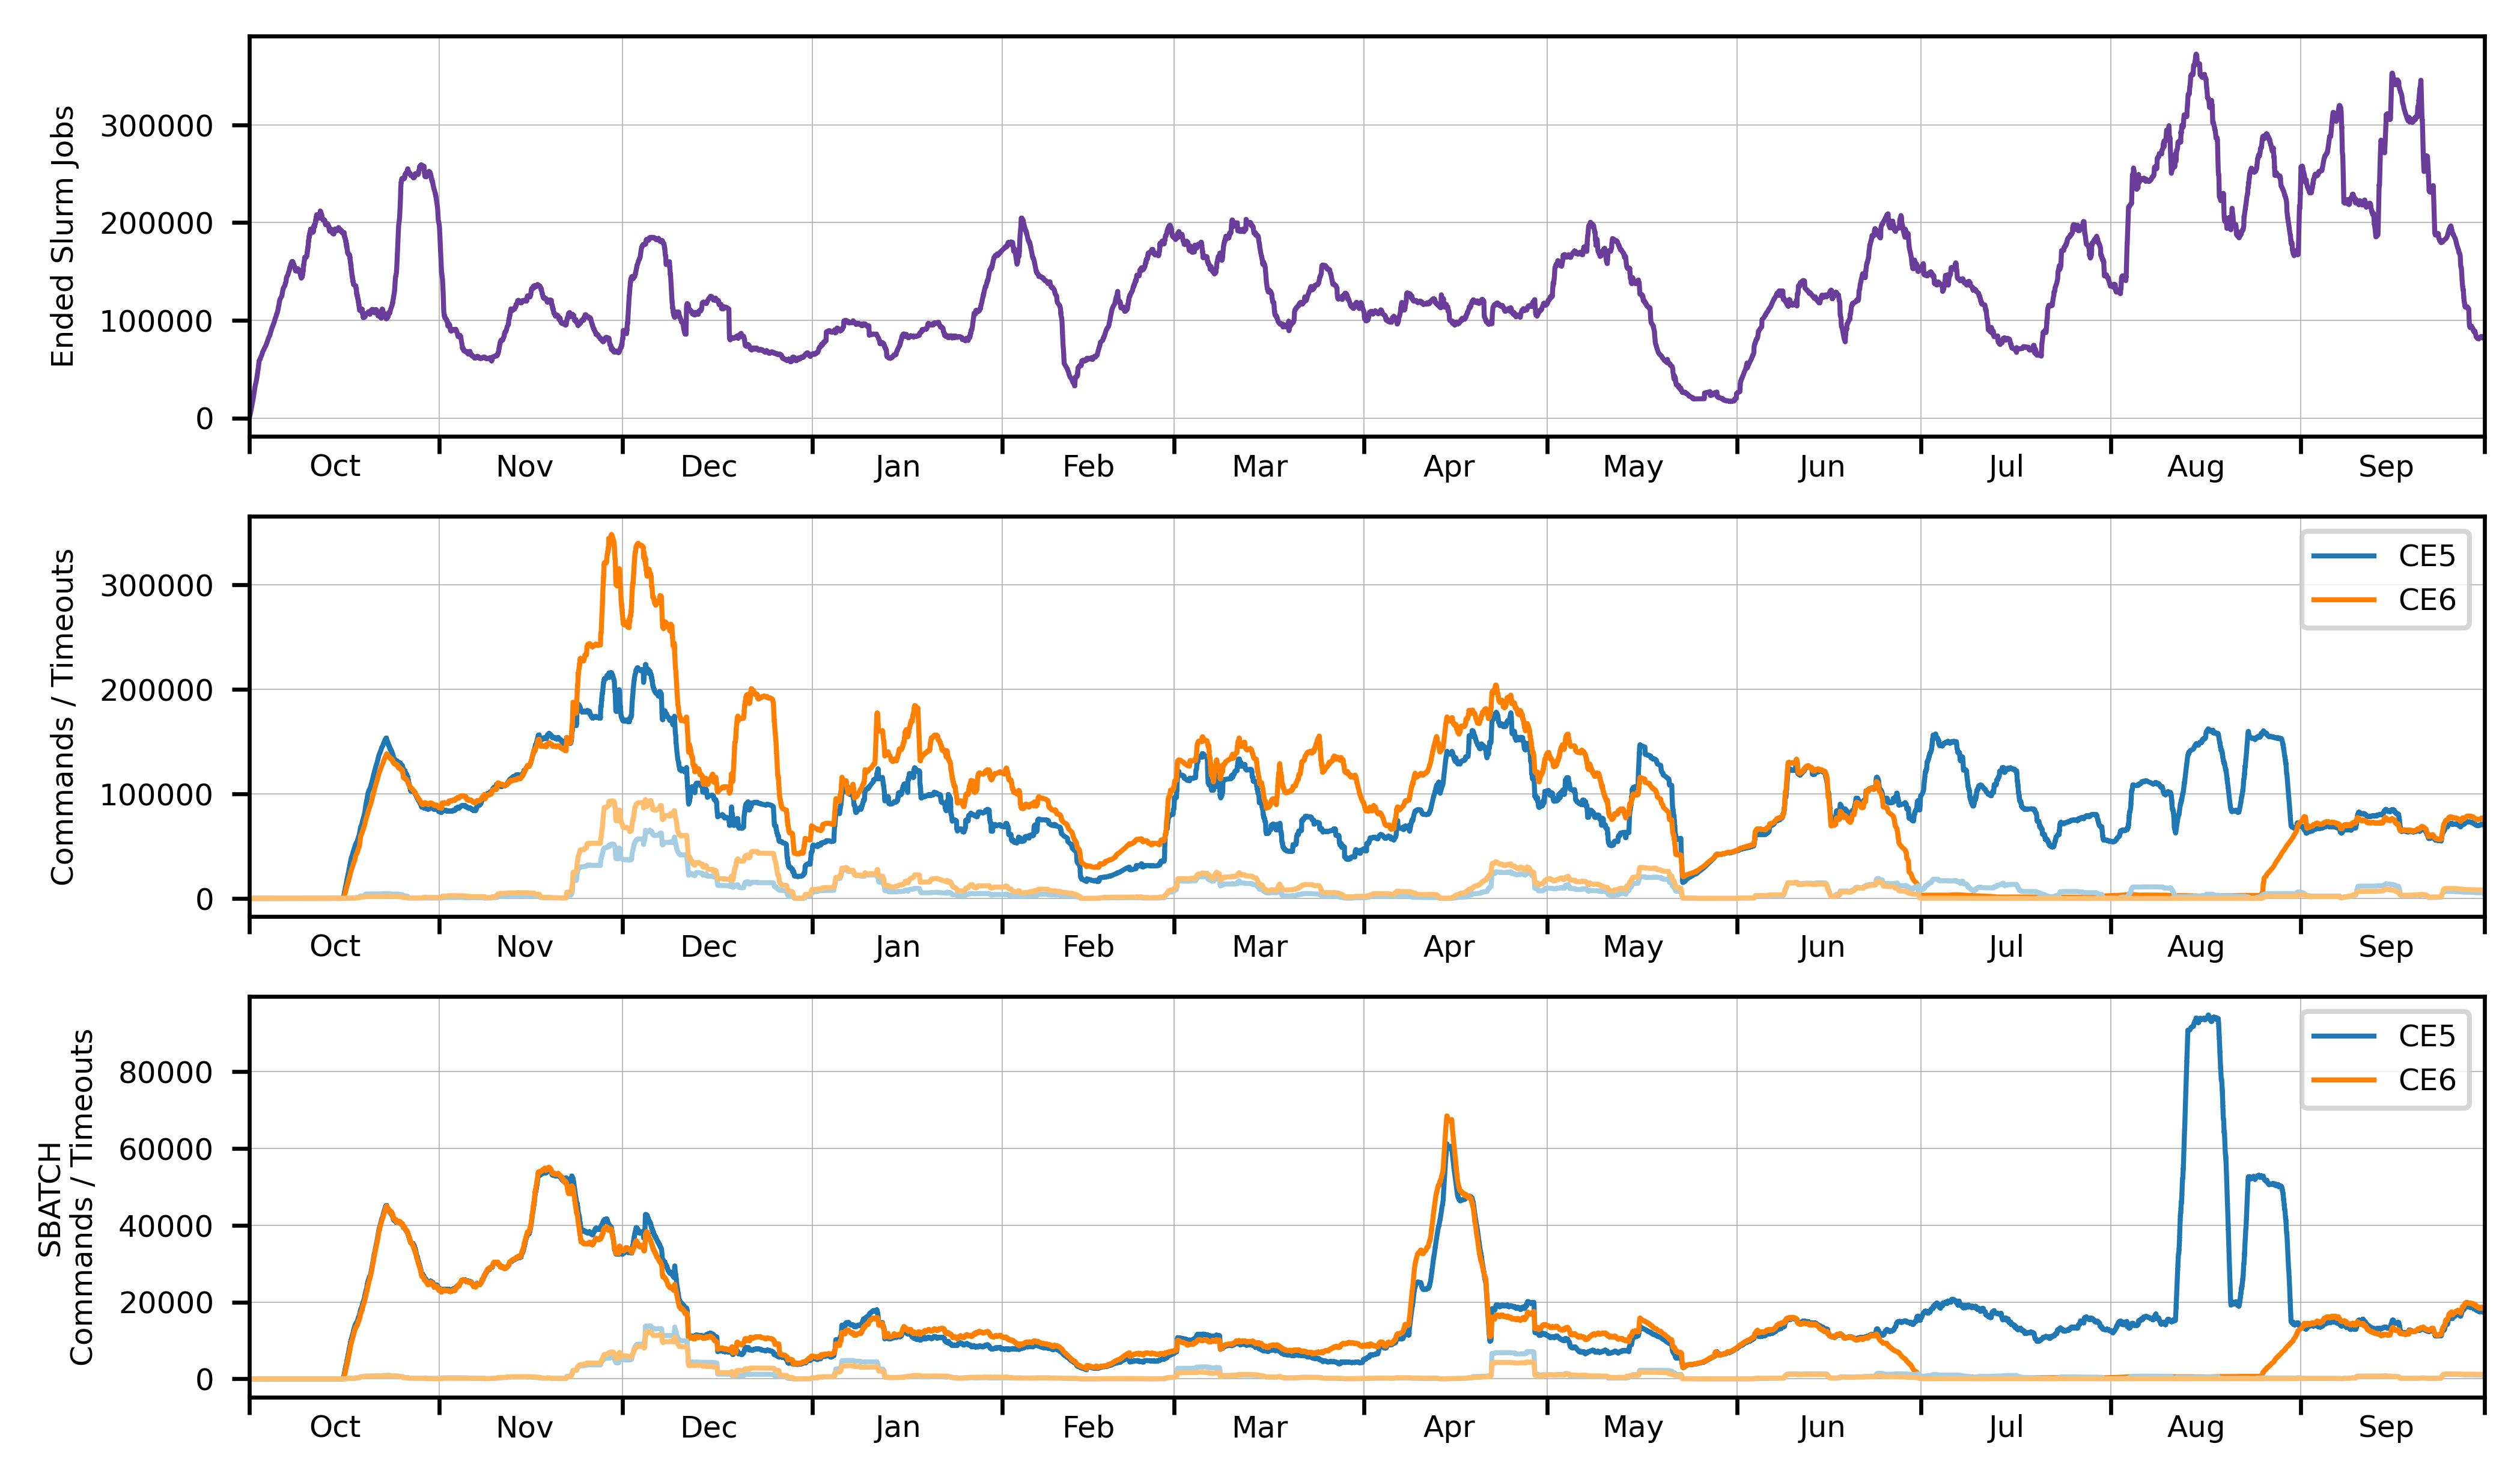

In [9]:
# Plot ended jobs, all commands/timeouts, and sbatch commands/timeouts
fig, axs = plt.subplots(3, 1, figsize = (8, 5), dpi = 600)

slurm_palette = sns.color_palette('Paired')[9]
commands_palette = [sns.color_palette('Paired')[1], sns.color_palette('Paired')[7]]
timeouts_palette = [sns.color_palette('Paired')[0], sns.color_palette('Paired')[6]]

sns.lineplot(x = slurm_7day_rolling.index, 
             y = 'ENDEDJOBS', 
             data = slurm_7day_rolling, 
             linewidth = 1, 
             color = slurm_palette, 
             ax = axs[0]
)

sns.lineplot(x = ce5_ce6_7day_rolling.index, 
             y = 'COMMANDS', 
             data = ce5_ce6_7day_rolling, 
             linewidth = 1, 
             hue = 'SERVER', 
             palette = commands_palette, 
             ax = axs[1]
)

sns.lineplot(x = ce5_ce6_7day_rolling.index, 
             y = 'TIMEOUTS', 
             data = ce5_ce6_7day_rolling, 
             linewidth = 1, 
             hue = 'SERVER', 
             palette = timeouts_palette, 
             ax = axs[1]
)

sns.lineplot(x = ce5_ce6_7day_rolling.index, 
             y = 'SBATCH_COMMANDS', 
             data = ce5_ce6_7day_rolling, 
             linewidth = 1, 
             hue = 'SERVER', 
             palette = commands_palette, 
             ax = axs[2]
)

sns.lineplot(x = ce5_ce6_7day_rolling.index, 
             y = 'SBATCH_TIMEOUTS', 
             data = ce5_ce6_7day_rolling, 
             linewidth = 1, 
             hue = 'SERVER', 
             palette = timeouts_palette, 
             ax = axs[2]
)

axs[0].set_ylabel('Ended Slurm Jobs')
axs[1].set_ylabel('Commands / Timeouts')
axs[2].set_ylabel('SBATCH\nCommands / Timeouts')

[ax.set_xlabel('') for ax in axs]
[ax.yaxis.label.set_size(6) for ax in axs]
[ax.xaxis.set_major_locator(mdates.MonthLocator()) for ax in axs]
[ax.xaxis.set_major_formatter(ticker.NullFormatter()) for ax in axs]
[ax.xaxis.set_minor_locator(mdates.DayLocator(bymonthday = 15)) for ax in axs]
[ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b')) for ax in axs]
[ax.set_xlim([datetime.date(2020, 10, 1), datetime.date(2021, 10, 1)]) for ax in axs]
[ax.tick_params(which = 'major', labelsize = 6) for ax in axs]
[ax.tick_params(which = 'minor', length = 0, labelsize = 6) for ax in axs]
[ax.grid(linewidth = 0.2) for ax in axs]
[ax.legend(title = '', labels = ['CE5', 'CE6'], fontsize = 6) for ax in axs[1:]]

plt.show()

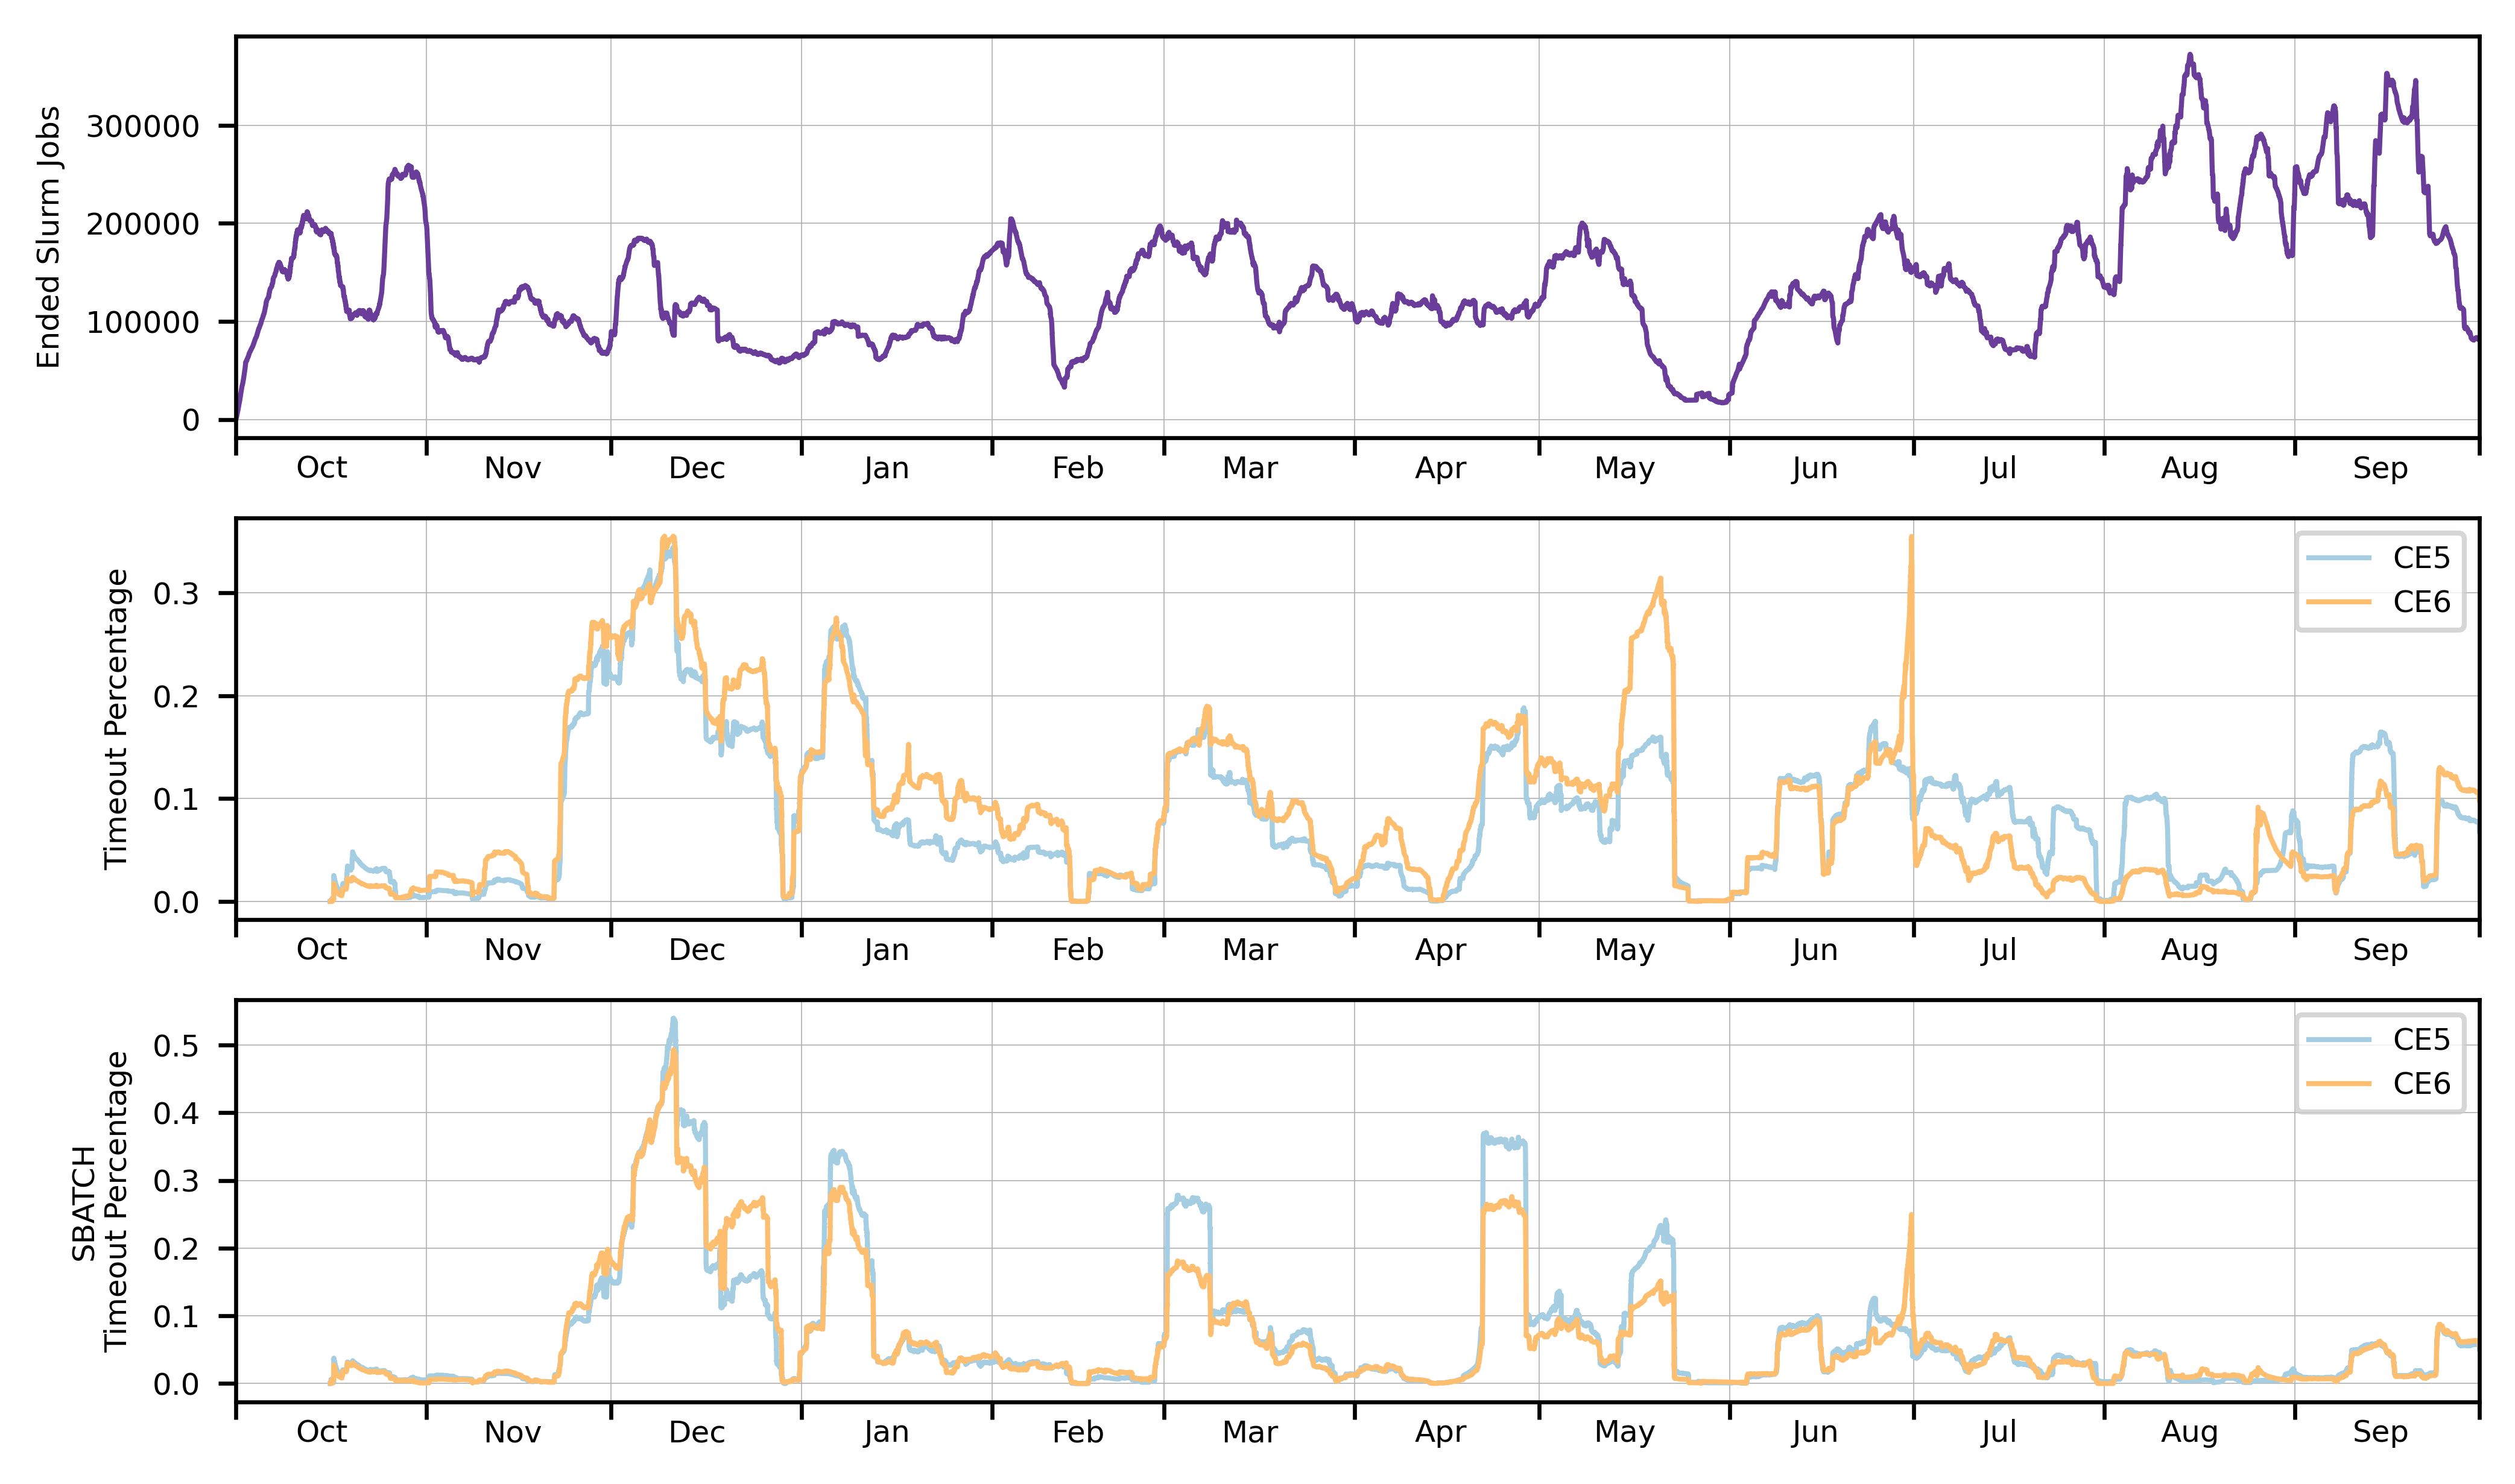

In [10]:
# Plot ended jobs, timeout percentage, and sbatch timeout percentage
fig, axs = plt.subplots(3, 1, figsize = (8, 5), dpi = 600)

slurm_palette = sns.color_palette('Paired')[9]
commands_palette = [sns.color_palette('Paired')[1], sns.color_palette('Paired')[7]]
timeouts_palette = [sns.color_palette('Paired')[0], sns.color_palette('Paired')[6]]

sns.lineplot(x = slurm_7day_rolling.index, 
             y = 'ENDEDJOBS', 
             data = slurm_7day_rolling, 
             linewidth = 1, 
             color = slurm_palette, 
             ax = axs[0]
)

sns.lineplot(x = ce5_ce6_7day_rolling.index, 
             y = 'TIMEOUT_PCT', 
             data = ce5_ce6_7day_rolling, 
             linewidth = 1, 
             hue = 'SERVER', 
             palette = timeouts_palette, 
             ax = axs[1]
)

sns.lineplot(x = ce5_ce6_7day_rolling.index, 
             y = 'SBATCH_TIMEOUT_PCT', 
             data = ce5_ce6_7day_rolling, 
             linewidth = 1, 
             hue = 'SERVER', 
             palette = timeouts_palette, 
             ax = axs[2]
)

axs[0].set_ylabel('Ended Slurm Jobs')
axs[1].set_ylabel('Timeout Percentage')
axs[2].set_ylabel('SBATCH\nTimeout Percentage')

[ax.set_xlabel('') for ax in axs]
[ax.yaxis.label.set_size(6) for ax in axs]
[ax.xaxis.set_major_locator(mdates.MonthLocator()) for ax in axs]
[ax.xaxis.set_major_formatter(ticker.NullFormatter()) for ax in axs]
[ax.xaxis.set_minor_locator(mdates.DayLocator(bymonthday = 15)) for ax in axs]
[ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b')) for ax in axs]
[ax.set_xlim([datetime.date(2020, 10, 1), datetime.date(2021, 10, 1)]) for ax in axs]
[ax.tick_params(which = 'major', labelsize = 6) for ax in axs]
[ax.tick_params(which = 'minor', length = 0, labelsize = 6) for ax in axs]
[ax.grid(linewidth = 0.2) for ax in axs]
[ax.legend(title = '', labels = ['CE5', 'CE6'], fontsize = 6) for ax in axs[1:]]

plt.show()

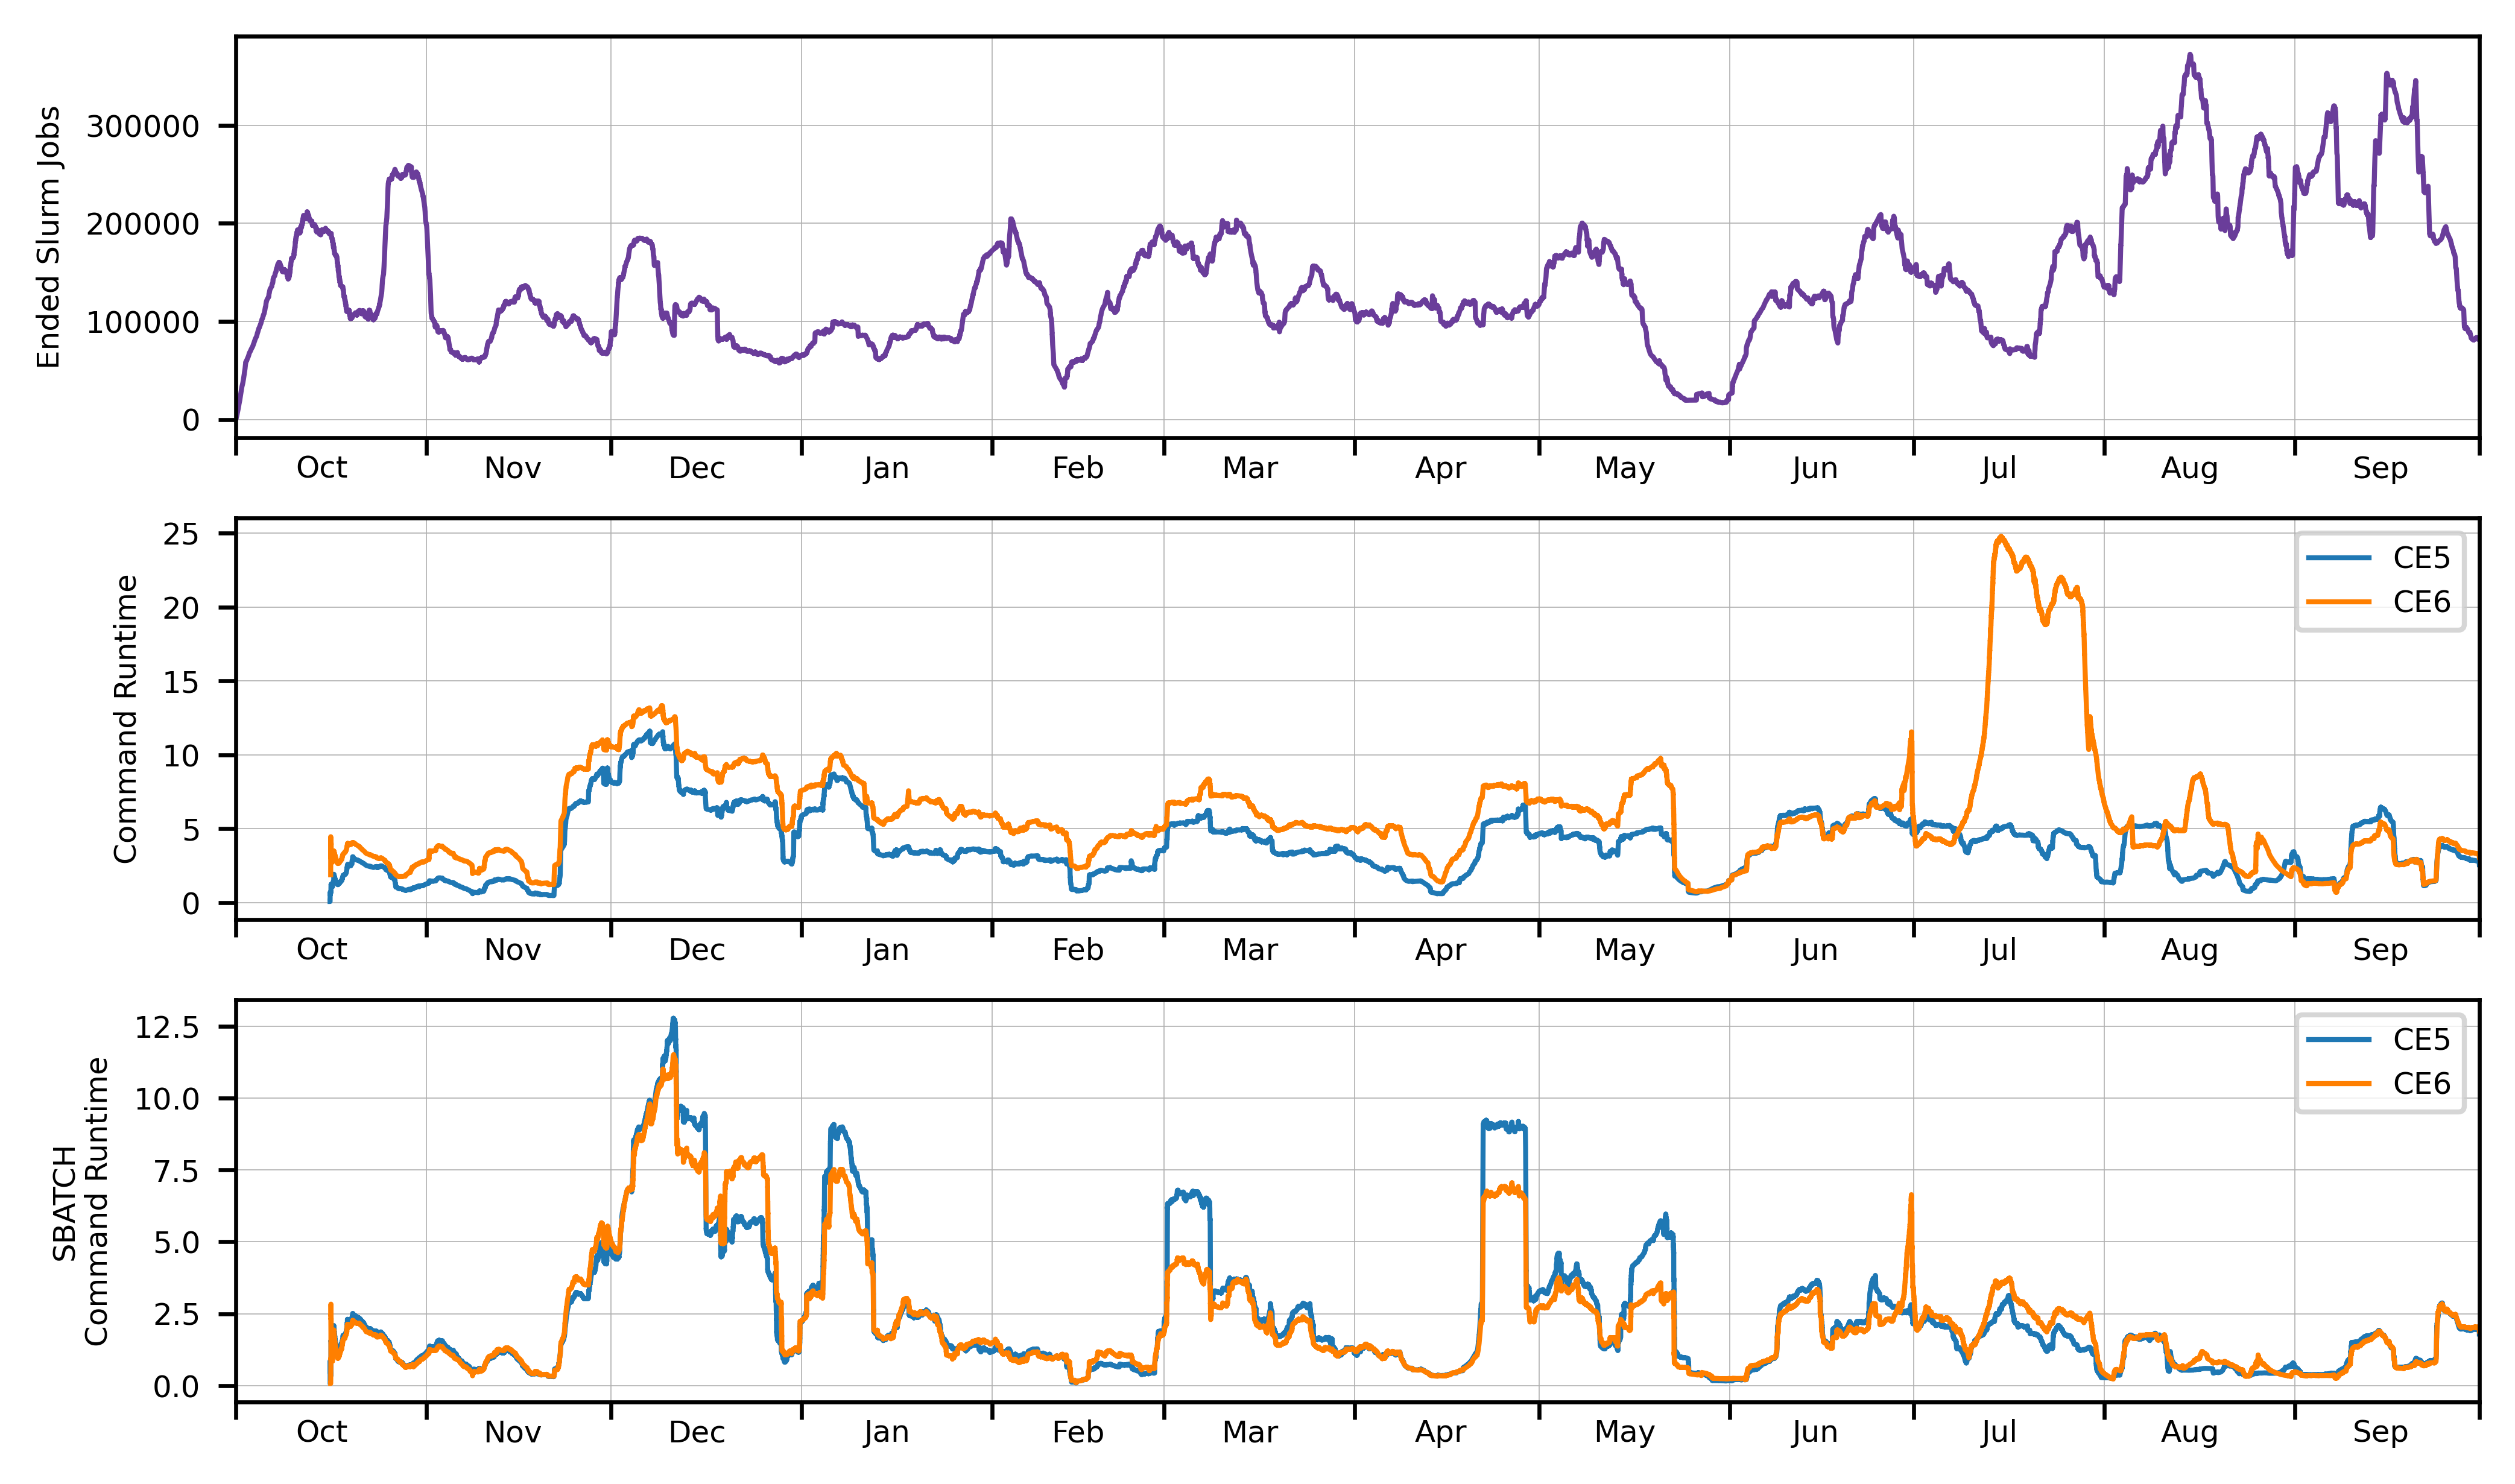

In [11]:
# Plot ended jobs, all command runtimes, and sbatch command runtimes

fig, axs = plt.subplots(3, 1, figsize = (8, 5), dpi = 600)

slurm_palette = sns.color_palette('Paired')[9]
commands_palette = [sns.color_palette('Paired')[1], sns.color_palette('Paired')[7]]
timeouts_palette = [sns.color_palette('Paired')[0], sns.color_palette('Paired')[6]]

sns.lineplot(x = slurm_7day_rolling.index, 
             y = 'ENDEDJOBS', 
             data = slurm_7day_rolling, 
             linewidth = 1, 
             color = slurm_palette, 
             ax = axs[0]
)

sns.lineplot(x = ce5_ce6_7day_rolling.index, 
             y = 'AVG_RUNTIME', 
             data = ce5_ce6_7day_rolling, 
             linewidth = 1, 
             hue = 'SERVER', 
             palette = commands_palette, 
             ax = axs[1]
)

sns.lineplot(x = ce5_ce6_7day_rolling.index, 
             y = 'AVG_SBATCH_RUNTIME', 
             data = ce5_ce6_7day_rolling, 
             linewidth = 1, 
             hue = 'SERVER', 
             palette = commands_palette, 
             ax = axs[2]
)

axs[0].set_ylabel('Ended Slurm Jobs')
axs[1].set_ylabel('Command Runtime')
axs[2].set_ylabel('SBATCH\nCommand Runtime')

[ax.set_xlabel('') for ax in axs]
[ax.yaxis.label.set_size(6) for ax in axs]
[ax.xaxis.set_major_locator(mdates.MonthLocator()) for ax in axs]
[ax.xaxis.set_major_formatter(ticker.NullFormatter()) for ax in axs]
[ax.xaxis.set_minor_locator(mdates.DayLocator(bymonthday = 15)) for ax in axs]
[ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b')) for ax in axs]
[ax.set_xlim([datetime.date(2020, 10, 1), datetime.date(2021, 10, 1)]) for ax in axs]
[ax.tick_params(which = 'major', labelsize = 6) for ax in axs]
[ax.tick_params(which = 'minor', length = 0, labelsize = 6) for ax in axs]
[ax.grid(linewidth = 0.2) for ax in axs]
[ax.legend(title = '', labels = ['CE5', 'CE6'], fontsize = 6) for ax in axs[1:]]

plt.show()